# Montecarlo generation
Goal is the use Montecarlo method to generate N random numbers according to a given PDF.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as inte

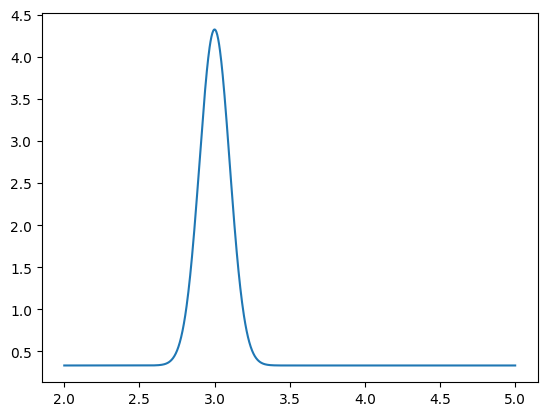

In [53]:
a = 2
b = 5
N = 2500

# This isn't normalised. Will not matter for the generation anyway.
def f (x):
    return stats.norm.pdf(x, loc=3, scale=0.1) + stats.uniform.pdf(x, loc=2, scale=3)

x_space = np.linspace(2, 5, 1000)
plt.plot(x_space, f(x_space))

## Hit or miss method

Reject-rate: 84.96602321246016 %


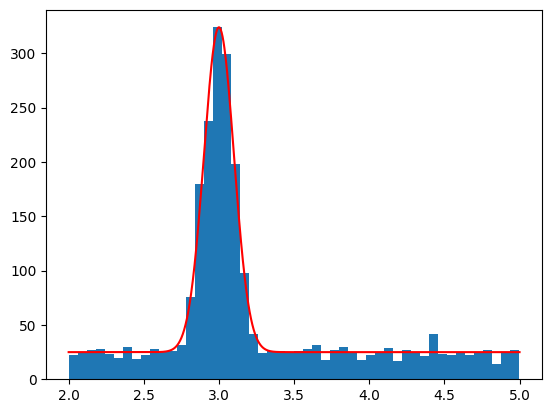

In [54]:
max = np.max(f(x_space))

results = np.array([])
total_iterations = 0
while len(results) < N:
    total_iterations = total_iterations+1
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, max)

    if y < f(x):
        results = np.append(results, x)

print('Reject-rate: ' + str((total_iterations - N)/total_iterations * 100) + ' %')
n, bins, _ = plt.hist(results, bins=50)

max_n = np.max(n)
# Function must be re-scaled in order to be displayed on the histogram.
plt.plot(x_space, f(x_space) / max * max_n, color='red')


Error I prob (alpha) = 64.12509254859998 %


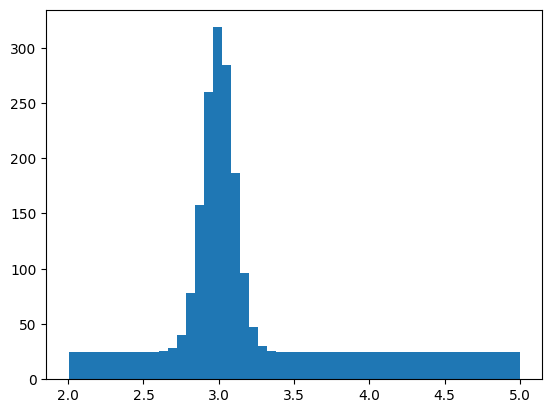

In [81]:
# Calculating chi square

probability = np.array([ inte.quad(f, bins[i], bins[i + 1])[0] for i in range(len(bins) - 1)])

# Probability must be normalised since function is not normalised.
expected = probability / sum(probability) * N

binCenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

plt.bar(x= binCenters, width= bins[1]-bins[0],height=expected )

result = stats.chisquare(n / sum(n) * sum(expected), expected)

print('Error I prob (alpha) = '  + str(result[1] * 100) + ' %')